In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from linearmodels import PooledOLS
from linearmodels import RandomEffects

In [3]:
# Read in Data
calc_data = pd.read_csv("./Data/calc_data.csv")

In [4]:
calc_data.head()
# poverty_rate: percent(%) of state residents at or below 100% of the federal poverty line
# unemplo_rate: percent(%) of state residents over the age of 16 not in the labor force
# justice_rate: percent(%) of state residents incarcerated (in jail or under jail custody or in prison), on parole, or on probation
# violent_rate: number of violent crime incidences per 100 state residents
# property_rate: number of property crime incidences per 100 state residents
# welfare_povcap: state welfare spending in dollars($) per state resident at or below 100% of the federal poverty line
# welfare_percap: state welfare spending in dollars($) per state resident

,Unnamed: 0,state_name,state_initial,state_num,year,poverty_rate,unemploy_rate,justice_rate,violent_rate,property_rate,welfare_povcap,welfare_percap
0,0,Alabama,AL,1,2010,19.0,7.0,2.140814,0.377311,3.512574,6.634749,1.260602
1,1,Alaska,AK,2,2010,9.9,6.6,1.789721,0.635514,2.837753,25.466003,2.521134
2,2,Arizona,AZ,3,2010,17.4,7.2,2.299276,0.407122,3.525627,8.262792,1.437726
3,3,Arkansas,AR,4,2010,18.8,5.8,2.086791,0.504284,3.551550,7.810438,1.468362
4,4,California,CA,5,2010,15.8,8.2,1.913700,0.439805,2.631169,10.828264,1.710866


R-squared:  0.228


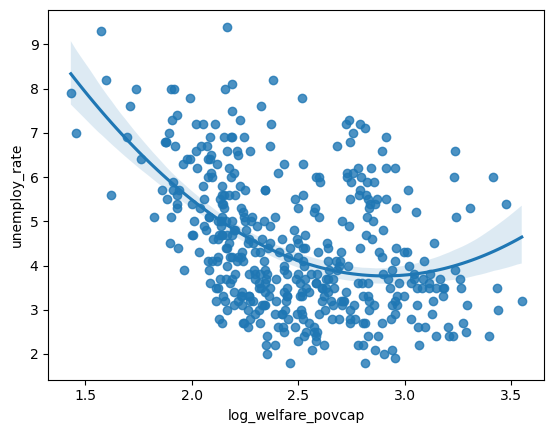

In [35]:
calc_data['log_welfare_povcap'] = np.log(calc_data.welfare_povcap)
model1 = ols(formula = "unemploy_rate ~ log_welfare_povcap + I(log_welfare_povcap**2)", data = calc_data).fit()
sns.regplot(data = calc_data, x = "log_welfare_povcap", y = "unemploy_rate", order=2)
print("R-squared: ", round(model1.rsquared_adj,3))

R-squared:  0.07


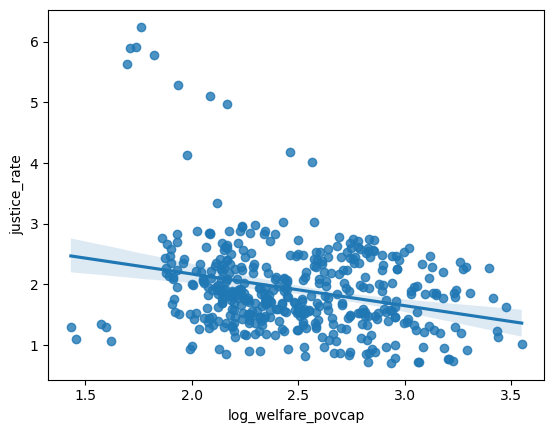

In [39]:
model2 = ols(formula = "justice_rate ~ log_welfare_povcap", data = calc_data).fit()
sns.regplot(data = calc_data, x = "welfare_povcap", y = "justice_rate")
print("R-squared: ", round(model2.rsquared_adj,3))